# 2-1. DKTC (Dataset of Korean Threatening Conversations)

안녕하세요, DLThon을 시작해볼까요!.😁
여러분이 지금까지 교육 과정 중 배운 내용을 토대로, 아래의 데이터셋을 활용하여 프로젝트를 구성해주세요.

## 데이터셋 정보
---
본 데이터셋은 tunib에서 제공하는 데이터셋으로, 멀티턴 대화 형식의 데이터로 구성되어 있습니다.

train.csv
```
1. idx = 인덱스
2. class = 0~3
class 0; 협박 대화
class 1; 갈취 대화
class 2; 직장 내 괴롭힘 대화
class 3; 기타 괴롭힘 대화
3. conversation = \n으로 구분된 멀티턴 텍스트 대화
```
test.json
```
1. t_### = 인덱스
2. text = 대화
```

submission.csv
```
1. file_name = 인덱스
2. class = 예측값
```

데이터셋
```
$ mkdir -p ~/aiffel/dktc
$ ln -s ~/data/ ~/aiffel/dktc
```

In [8]:
import os
import pandas as pd

train_data_path ="~/aiffel/DLthon_data/train_resub2.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation,text
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동경찰서입니다 9시 40분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 더 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어이 거기 예 너 말이야 너 이리 오라고 무슨 일 너 옷 좋아보인다 얘 돈 좀 있...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 이 선크림 파는데 한 번 손등에 발...


## 과제
---
DKTC 훈련 데이터를 이용해
협박, 갈취, 직장 내 괴롭힘, 기타 괴롭힘 4가지 대화 유형 Class를 분류하는 딥러닝 모델을 만듭니다.
CAM을 통해 어떤 데이터가 class를 결정하는데 영향을 미쳤는지 시각화하여 확인해봅니다.
W&B를 통해 모델 학습 및 파라미터를 관리합니다.
DKTC 테스트 데이터를 활용해 분류 성능을 평가합니다.

## 규칙
---
1. 아래 프로젝트 평가 항목을 참고하여 프로젝트를 수행해주세요.
2. 프로젝트 최종 결과물 이 업로드된 깃헙 링크를 프로젝트 제출 기한 내 2-3 프로젝트 제출 스텝에 제출해주세요.  
(재현가능한 코드가 담긴 주피터 노트북 파일 & 발표자료 PPT)
3. 외부 데이터 활용은 허용하되, 제공된 데이터를 활용한 기록이 필수적으로 포함되어야 합니다.  
4. 부정 제출 행위를 금지하고 있으며, 부정 제출 이력이 있는 경우 평가가 제한됩니다.

## 프로젝트 평가 항목  
---
> 1.데이터 EDA와 데이터 전처리가 적절하게 이뤄졌는가?  
> 2.Task에 알맞게 적절한 모델을 찾아보고 선정했는가?  
> 3.성능향상을 위해 논리적으로 접근했는가?  
> 4.결과 도출을 위해 여러가지 시도를 진행했는가?  
> 5.도출된 결론에 충분한 설득력이 있는가?  
> 6.적절한 metric을 설정하고 그 사용 근거 및 결과를 분석하였는가?  
> 7.발표가 매끄럽게 진행되었고 발표시간을 준수하였는지?

## 2-2. W&B
---

W&B는 TensorBoard와 유사하게 여러분의 모델 학습을 자동화하고 분석하는 도구입니다.  
W&B에는 많은 기능을 제공하기 때문에 여기에서는 여러분들이 짧은 시간 내에 간단하게 사용할 수 있으면서도 매우 유용한 Sweep과 WandbCallback 두가지를 중점으로 소개하도록 하겠습니다.  
아래는 W&B를 살펴보기 전에 알고 시작해야할 몇가지 용어에 대한 소개입니다.

용어소개

### 1. Run
W&B는 기본적으로 run 단위로 실험을 관리합니다.  
run은 모델과 하이퍼 파라미터를 세팅하고 정해진 에포크까지 학습을 진행하는 것까지를 1회로 간주합니다.  
W&B의 대표적인 기능인 experiment tracking은 이 run을 기준으로 해당 run에서 진행한 내용과 결과를 기록하고 추적하게 됩니다.

### 2. Sweep
W&B를 상징하는 기능인 sweep은 여러분께는 random search, 혹은 grid search라는 명칭으로 더 익숙하실 하이퍼파라미터 튜닝과 모델 최적화 기능입니다.  
정해진 조건에 도달할 때까지 설정한 하이퍼 파라미터를 조합하고 run을 실행시킵니다.

### 3. Config
위에서 소개한 run과 sweep은 각각 하이퍼 파라미터가 필요합니다.  
W&B에서는(특히 도큐먼트에서는) 해당 파라미터를 config라고 표현합니다.  
run의 config는 1회만 동작하기 때문에 고정된 값이 주어져야하며 sweep의 경우 하이퍼 파라미터의 범위가 주어져야합니다.

## 구조 설명

### 1. Run
각 run은 init - 모델 학습 - 기록의 구조를 띄고 있습니다.  
init을 통해 해당 run의 하이퍼 파라미터를 비롯하여 run의 이름, run이 속한 프로젝트, 추가 기록 등등 run의 정보들을 설정합니다.  
모델을 정해진 하이퍼 파라미터에 맞춰 학습시키며 해당 과정을 추적하고 그 중 필요한 정보를 기록하여 서버에 전송합니다.  

### 2. Sweep
Sweep은 하이퍼 파라미터를 조합할 정보를 담은 Sweep 객체와 매번 동작시킬 함수, 그리고 이를 조정할 에이전트로 구성이 되어있습니다.  
에이전트는 매번 Sweep 객체에 등록된 config를 바탕으로 하이퍼 파라미터를 조합하고 이를 바탕으로 주어진 함수를 동작시킵니다.  
해당 함수에는 일반적인 run 전체가 완결성을 갖고 포함되어있어야하며 모든 경우의 수가 조합 될 때까지, 혹은 정해진 조건이 만족될 때까지 반복되기 때문에 가능한 반복되어야하는 것만 담는 것을 추천합니다

### 3. Project
W&B는 프로젝트 단위로 전체 실험을 관리합니다. Github의 레파지토리와 비슷한 레벨의 단위로 생각할 수 있습니다.  
프로젝트 하위에는 run이 포함됩니다.  
각 run은 Sweep 단위로도 묶일 수 있지만 이해하기 편하게 Project - Sweep - Run의 구조를 가졌다고 생각하셔도 무방합니다.

설명은 이정도로하고 코드를 보면서 더 자세히 살펴보겠습니다.

W&B는 많은 사람이 사용하며 항상 최신 트렌드를 반영하는만큼 가장 자주 업데이트되는 라이브러리 중 하나입니다.  
여기에서는 0.16.0 버전을 기준으로 사용하겠습니다.  
아래 라이브러리를 먼저 설치해주세요  
```
$ pip install wandb==0.16.0
```
이번 예제는 tensorflow의 segmentation 예제를 기본으로 제작되었습니다. [링크](https://www.tensorflow.org/tutorials/images/segmentation?hl=ko)

필요한 도구를 불러옵니다.  
Wandb 관련으로는 Wandb 자체와 WandbCallback 함수 두가지만 불러오겠습니다.  
데이터 로드를 비롯한 전처리 과정은 반복될 필요가 없기 때문에 미리 진행해두고 Sweep 함수에는 포함시키지 않겠습니다.  

In [16]:
import torch
from transformers import BertConfig, BertModel, BertForPreTraining, BertTokenizer
from unicodedata import normalize

tokenizer_krbert = BertTokenizer.from_pretrained('/path/to/vocab_file.txt', do_lower_case=False)

# convert a string into sub-char
def to_subchar(string):
    return normalize('NFKD', string)

sentence = '토크나이저 예시입니다.'
print(tokenizer_krbert.tokenize(to_subchar(sentence)))


HTTPError: 404 Client Error: Not Found for url: https://huggingface.co/api/models//path/to/vocab_file.txt

In [11]:
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

# Load pre-trained BERT model and tokenizer
model_name = "snunlp/KR-Medium"
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_model = TFBertModel.from_pretrained(model_name)

# Prepare dataset for BERT
def encode_conversations(conversations, max_length):
    return tokenizer(conversations,
                     padding='max_length',
                     truncation=True,
                     return_tensors='tf',
                     max_length=max_length)

# Encode the text data
encoded_train = encode_conversations(train_data["conversation"].tolist(), max_length=128)

# Extract the input ids and attention masks
input_ids = encoded_train['input_ids']
attention_masks = encoded_train['attention_mask']

# Define the model architecture
def build_model(bert_model, num_classes):
    input_ids = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name="input_ids")
    attention_mask = tf.keras.layers.Input(shape=(128,), dtype=tf.int32, name="attention_mask")

    bert_output = bert_model(input_ids, attention_mask=attention_mask)
    sequence_output = bert_output.last_hidden_state
    pooled_output = sequence_output[:, 0, :]  # we are using the [CLS] token output as sentence embedding
    dense = tf.keras.layers.Dense(512, activation='relu')(pooled_output)
    prediction = tf.keras.layers.Dense(num_classes, activation='softmax')(dense)

    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=prediction)
    return model

# Build the model
model = build_model(bert_model, num_classes=len(CLASS_NAMES))

# Compile the model
optimizer = Adam(learning_rate=3e-5, epsilon=1e-08)
loss = SparseCategoricalCrossentropy(from_logits=True)
metric = SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Convert labels to tensor
labels = tf.convert_to_tensor(train_data['class'])

# Train the model
model.fit([input_ids, attention_masks], labels, epochs=3, batch_size=32)


404 Client Error: Not Found for url: https://huggingface.co/snunlp/KR-Medium/resolve/main/tf_model.h5


OSError: Can't load weights for 'snunlp/KR-Medium'. Make sure that:

- 'snunlp/KR-Medium' is a correct model identifier listed on 'https://huggingface.co/models'

- or 'snunlp/KR-Medium' is the correct path to a directory containing a file named one of tf_model.h5, pytorch_model.bin.



In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import wandb
from wandb.keras import WandbCallback
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 토큰화된 텍스트를 다시 문자열로 변환
train_data['tokenized_text'] = train_data['tokenized'].apply(lambda x: ' '.join(x))

# TF-IDF 벡터화 객체 초기화
tfidf_vectorizer = TfidfVectorizer()

# 토큰화된 텍스트에 대해 TF-IDF 특성 학습 및 변환
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['tokenized_text'])

# 결과를 확인
print(tfidf_matrix.shape)  # 특성의 차원을 출력


(3950, 29672)


In [36]:
from sklearn.preprocessing import LabelEncoder

# 레이블 인코더 초기화
encoder = LabelEncoder()

# 'class' 열에 레이블 인코딩 적용
train_data['encoded_class'] = encoder.fit_transform(train_data['class'])

# 인코딩된 레이블 확인
train_data[['class', 'encoded_class']].head()

,class,encoded_class
0,3,3
1,3,3
2,1,1
3,0,0
4,0,0


In [9]:
CLASS_NAMES = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화']

encoder = LabelEncoder()
encoder.fit(CLASS_NAMES)

train_data['class'] = encoder.transform(train_data['class'])

corpus = train_data["conversation"]

In [10]:
def tokenize(corpus):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(
        num_words=1000, 
        filters=' ',
        oov_token="<unk>")
    tokenizer.fit_on_texts(corpus)
    tensor = tokenizer.texts_to_sequences(corpus)   
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post',maxlen=20)  
    
    print(tensor,tokenizer)
    return tensor, tokenizer

tensor, tokenizer = tokenize(corpus)

[[  1 210   1 ...   1  41   1]
 [  1   1   1 ...   1   1 396]
 [  1  96   1 ...   1 125   1]
 ...
 [485   3 113 ...  27   1   1]
 [  1   1 152 ... 350   1   1]
 [  1   1   1 ... 156 114   1]] <keras_preprocessing.text.Tokenizer object at 0x7f0b78cf1730>


In [11]:
for idx in tokenizer.index_word:
    print(idx, ":", tokenizer.index_word[idx])

    if idx >= 10: break

1 : <unk>
2 : 내가
3 : 너
4 : 좀
5 : 다
6 : 왜
7 : 나
8 : 진짜
9 : 야
10 : 지금


In [12]:
X_train = tensor[:3500]
y_train = train_data['class'][:3500]
X_val = tensor[3500:3850]
y_val = train_data['class'][3500:3850]
X_test = tensor[3850:]
y_test = train_data['class'][3850:]

W&B를 사용하기 위해서는 로그인이 필요합니다.  
프로젝트의 옵션에 따라서 실험 기록 자체는 익명으로 혹은 조직명으로 할 수 있습니다.  
로그인은 API 키를 통해서 진행 가능합니다.  
해당 키는 아래와 같이 얻을 수 있습니다.

1. [https://wandb.ai/settings](https://wandb.ai/settings) 접속
2. Danger Zone에서 키 생성 혹은 복사

In [20]:
wandb.login(key = "f3eef2a5431be5adbc30764a64fec6cf0bdfe6d6")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /aiffel/.netrc


True

Sweep의 config를 설정합니다. 단, config는 sweep 객체를 선언하기 전에 위치해야합니다.  

Sweep의 config에는 Sweep의 이름, metric, method, parameters가 포함되어야하며 name이 지정되지 않았을 경우 이름이 랜덤으로 생성되어 새로Sweep을 동작시켰을 때 같은 Sweep으로 묶이지 않습니다.  

metric은 모델을 학습시킬 때 validation loss, accuracy등 학습이 잘 진행되고 있는지, 오버피팅이 발생하지 않는지 등을 판별할 지표를 선택하여야 하고 해당 지표가 크게 되는 것이 목표인지 작게 되는 것이 목표인지 설정해주어야합니다.
val_loss, minimize가 가장 일반적인 옵션이며 method에서 bayes 방식을 선택할 경우 필수 값입니다.  

method는 grid, random, bayes 세가지가 제공되며 beyes의 경우 확률 분포 값으로 앞선 두 방식을 통해서 최적의 하이퍼 파라미터에 근사했지만 좀 더 세밀한 조정이 필요할 경우 사용합니다.  

parameters는 실험할 하이퍼 파라미터가 포함되어야합니다.  
여기에는 int, float, 문자열, list 등 어떤 것이든 넣을 수 있으며 값의 분포 역시 최대 최소부터 샘플링까지 매우 자유도 높게 설정이 가능합니다. 상세한 하이퍼 파라미터 조합을 위해선 공식 문서를 참조 바랍니다.[링크](https://docs.wandb.ai/guides/sweeps/define-sweep-configuration#configuration-keys)

In [13]:
sweep_config = {
    "name": "sweep_test_nlp",
    "metric": {"name": "val_loss", "goal": "minimize"},
    "method": "random",
    "parameters": {
        "learning_rate" : {
            "min" : 0.001,
            "max" : 0.1
            },
        "epoch" : {
            "distribution" : "int_uniform",
            "min" : 5,
            "max" : 10
            }
                    
        }
    }

train 함수에는 하나의 run이 완결성있게 들어가야합니다.  
이 예시에서는 run의 config를 Sweep의 config보다 넓은 범위를 설정하였습니다.  
이 경우 장점으로는 필요한 경우 Sweep의 config에 해당 파라미터만 추가함으로서 손쉽게 커스텀할 수 있다는 것과 config에 정보를 담아놓는 것 만으로도 자동으로 서버에 기록된다는 것입니다.  

아래 코드와 같이 init - 모델 학습 - 기록 구조를 담아놓습니다.

In [14]:
def train():
    default_config = {
        "vocab" : 1000,
        "embeddings" : 64,
        "units_1" : 256,
        "units_2" : 256,
        "units_3" : 1024,
        "class_num" : 4,
        "learning_rate" : 0.005,
        "optimizer" : "adam",
        "loss" : "sparse_categorical_crossentropy",
        "metrics" : ["accuracy"],
        "epoch" : 5,
        "batch_size" : 32
    }

    wandb.init(config = default_config)
    config = wandb.config

    # Model

    model=keras.models.Sequential()
    model.add(keras.layers.Embedding(config.vocab, config.embeddings))
    model.add(keras.layers.GRU(units = config.units_1, return_sequences = True))
    model.add(keras.layers.GRU(units = config.units_2))
    model.add(keras.layers.Dense(config.units_3, activation='relu'))
    model.add(keras.layers.Dense(config.class_num, activation='softmax'))

    # 머신 러닝 학습때 여러가지 optimzier를 사용할 경우나 learning rate를 조절할 경우에는 아래와 같은 형태의 코드를 응용합니다.

    if config.optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate = config.learning_rate)
    
    model.compile(optimizer = optimizer,
                  loss = config.loss,
                  metrics = config.metrics)

    # WandbCallback 함수는 후술합니다.
    
    model.fit(X_train, y_train,
              epochs = config.epoch,
              batch_size = config.batch_size,
              validation_data = (X_val, y_val),
              callbacks = [WandbCallback()])
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    
    # wandb.log 함수 안에 기록하고 싶은 정보를 담습니다.
    
    wandb.log({"Test Accuracy Rate: " : round(test_accuracy * 100, 2),
               "Test Error Rate: " : round((1 - test_accuracy) * 100, 2)})

WandbCallback 함수는 사용법 자체는 일반적인 콜백함수와 동일하며 많은 내용들에 대해서 저장 및 시각화를 자동으로 진행합니다.  
주요 기능으로는 모델의 구조와 weight, gradient 등을 저장하는 것과 일부 태스크에 한하여 모델의 결과에 대한 시각화 등을 제공합니다.  
이 외에도 많은 기능이 있으니 상세한 내용은 공식문서를 참조하기 바랍니다.[링크](https://docs.wandb.ai/guides/integrations/keras#wandbcallback-legacy)

In [21]:
# entity와 project에 본인의 아이디와 프로젝트명을 입력하세요

sweep_id = wandb.sweep(sweep_config,
                       entity = <<YOUR CODE>>,
                       project = <<YOUR CODE>>)

# run the sweep
wandb.agent(sweep_id,
            function=train,
            count=10)

SyntaxError: invalid syntax (2072994524.py, line 4)

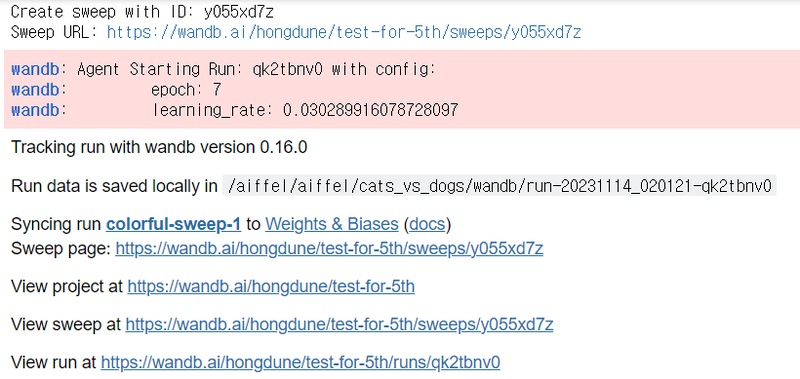

Sweep이 정상적으로 진행이 되었다면 위와 같은 안내 메시지, 그리고 학습이 진행될 것입니다.  
View sweep 주소로 접속하게 되면 아래와 같은 화면이 등장합니다.  
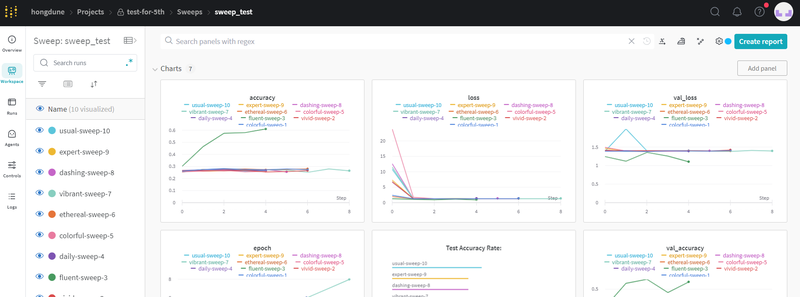

해당 대쉬보드에는 모델이 학습되는동안 추적된 많은 정보들이 기록되어있는데 W&B는 아래와 같이 간단한 분석 기능도 제공합니다.

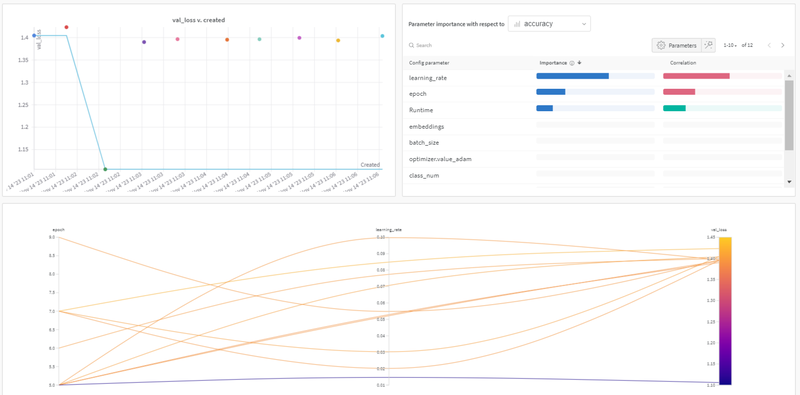

각 하이퍼 파라미터가 어떤 기록에 얼마나 큰 영향을 미치는지, 어떤 상관관계를 갖는지를 통해서 어떤 파라미터가 중요한지를 보여주기도 하며 전체 하이퍼 파라미터들의 관계를 직관적으로 파악할 수 있는 parallel coordinates 차트를 제공합니다.

## 2-3. DLThon

### DLthon 시작!
---
이 노드는 여러분들이 편하게 DLthon 프로젝트를 할 수 있도록 환경을 세팅했습니다. TensorFlow를 기본적으로, 저희가 각 노드에서 사용했던 라이브러리들이 탑재되어 있습니다. 추가로 PyTorch도 세팅되어 있습니다.  

환경을 확인하실 수 있도록 간단한 코드를 첨부했습니다.  

여러분들이 프로젝트를 진행할 때, 추가적인 라이브러리 버전 세팅이 필요할 수 있습니다. 이 경우, 필요한 환경의 검토가 완료되면 세션이 새롭게 시작될 때 환경 설정에 필요한 코드를 미리 준비해 두시면 좋습니다.  

스토리지에서 /aiffel 하위 디렉토리는 아시다시피 리셋 되지 않습니다. 모델 웨이트 등의 자료 및 코드 저장에 참고하시면 좋겠습니다.  

화이팅 넘치게 DLthon을 달려볼까요?? 🏃‍♂️🏃‍♀️  
힘차게 가보자구우!! 💪💪  

In [16]:
# 이 코드를 실행해보시면 설치된 라이브러리 버전을 확인해보실 수 있습니다.
!pip list

Package                       Version
----------------------------- ------------------
absl-py                       0.12.0
aiohttp                       3.8.1
aiosignal                     1.2.0
albumentations                1.1.0
antlr4-python3-runtime        4.8
anyio                         3.4.0
appdirs                       1.4.4
argon2-cffi                   21.1.0
astunparse                    1.6.3
async-generator               1.10
async-timeout                 4.0.1
attrs                         21.2.0
audioread                     2.1.9
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.6.0
black                         21.12b0
bleach                        4.1.0
branca                        0.4.2
brotlipy                      0.7.0
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
chardet                       3.0.4
charset-normalizer            2.0.8
clang 

In [17]:
# GPU로 Tesla T4가 준비돼있습니다.
!nvidia-smi

Mon Nov 20 02:57:09 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.182.03   Driver Version: 470.182.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 루브릭

| 평가요소 | 상세기준 |
|----------|----------|
| 1. 데이터 전처리 과정이 잘 이루어졌는가? | 데이터 정제 및 토큰화를 잘 수행하였다. 모델 학습에 충분한 데이터를 추가 수집 및 augmentation 하였다. |
| 2. 적절한 모델 및 평가지표를 선정했는가? | 한국어 문장 분류에 적절한 모델과, 해당 데이터셋 분류에 적합한 metric을 선택하고 선택 근거 및 결과를 잘 분석하였다. |
| 3. 모델의 분류 성능을 얼마나 달성했는가? | 선정한 metric에 따라 성능 개선 과정을 분석하고 목표한 수치 이상의 성능을 달성해냈다. |

## 회고